# Undiscounted random chain

In [177]:
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the different CSVs as DataFrames

In [178]:
in_parent_dir = '/Users/anthony/Playground/tensorboard_logs/10-03/undiscounted'
exp_csv_regex = 'exp*/progress.csv'

exp_csv_pathlist = glob.glob(os.path.join(in_parent_dir, exp_csv_regex))
exp_csv_pathlist

['/Users/anthony/Playground/tensorboard_logs/10-03/undiscounted/exp22_SR_trueR_sweep/progress.csv',
 '/Users/anthony/Playground/tensorboard_logs/10-03/undiscounted/exp1_STrace_sweep/progress.csv',
 '/Users/anthony/Playground/tensorboard_logs/10-03/undiscounted/exp8_STraceTrueSR_sweep/progress.csv',
 '/Users/anthony/Playground/tensorboard_logs/10-03/undiscounted/exp10_LambdaRet_smallLR_sweep/progress.csv',
 '/Users/anthony/Playground/tensorboard_logs/10-03/undiscounted/exp5_SRTrueSR_sweep/progress.csv']

#### Read all CSVs into a single dataframe

In [179]:
# Read all
exp_df_lists = []
for csv_path in exp_csv_pathlist:
    print('Reading:', csv_path)
    cur_df = pd.read_csv(csv_path, sep='\|\|')
    
    cur_df = cur_df.drop(cur_df.columns[0], axis=1)
    
    exp_df_lists.append(cur_df)

# Concat
data_df = pd.concat(exp_df_lists)

print(len(data_df))
data_df[0:5]

Reading: /Users/anthony/Playground/tensorboard_logs/10-03/undiscounted/exp22_SR_trueR_sweep/progress.csv


/Users/anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


Reading: /Users/anthony/Playground/tensorboard_logs/10-03/undiscounted/exp1_STrace_sweep/progress.csv
Reading: /Users/anthony/Playground/tensorboard_logs/10-03/undiscounted/exp8_STraceTrueSR_sweep/progress.csv
Reading: /Users/anthony/Playground/tensorboard_logs/10-03/undiscounted/exp10_LambdaRet_smallLR_sweep/progress.csv
Reading: /Users/anthony/Playground/tensorboard_logs/10-03/undiscounted/exp5_SRTrueSR_sweep/progress.csv
314500


/Users/anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


,agentCls_name,cumulative_reward,episode_idx,gamma,lamb,lr,n_states,num_episodes,s_mat_norm,s_mat_rmse,s_subsample_prop,seed,total_steps,use_rand_s_mat,use_true_r_fn,use_true_s_mat,v_vec_avg,v_vec_max,v_vec_min,v_vec_rmse
0,SRAgent,1.0,0,1.0,1.0,0.0001,19,10,None,6.79241,0.05,0,30,False,True,False,5.000000,5.0,5.00000,4.508326
1,SRAgent,1.0,1,1.0,1.0,0.0001,19,10,None,6.79239,0.05,0,114,False,True,False,5.000000,5.0,5.00000,4.508326
2,SRAgent,1.0,2,1.0,1.0,0.0001,19,10,None,6.79236,0.05,0,232,False,True,False,4.999976,5.0,4.99955,4.508304
3,SRAgent,1.0,3,1.0,1.0,0.0001,19,10,None,6.79236,0.05,0,22,False,True,False,4.999976,5.0,4.99955,4.508304
4,SRAgent,1.0,4,1.0,1.0,0.0001,19,10,None,6.79234,0.05,0,102,False,True,False,4.999976,5.0,4.99955,4.508304


## Get runs form a specific episode

In [180]:
epis_idx_filter = 9

epis_data_df = data_df[data_df['episode_idx']==epis_idx_filter]

print(len(epis_data_df))
epis_data_df[0:3]

31450


,agentCls_name,cumulative_reward,episode_idx,gamma,lamb,lr,n_states,num_episodes,s_mat_norm,s_mat_rmse,s_subsample_prop,seed,total_steps,use_rand_s_mat,use_true_r_fn,use_true_s_mat,v_vec_avg,v_vec_max,v_vec_min,v_vec_rmse
9,SRAgent,1.0,9,1.0,1.0,0.0001,19,10,None,6.79224,0.05,0,38,False,True,False,4.999950,5.00000,4.9995,4.508275
19,SRAgent,1.0,9,1.0,1.0,0.0001,19,10,None,6.79231,0.05,2,110,False,True,False,5.000003,5.00005,5.0000,4.508328
29,SRAgent,0.0,9,1.0,1.0,0.0001,19,10,None,6.79227,0.05,4,82,False,True,False,4.999979,5.00000,4.9996,4.508307


#### Get different sub-DataFrames depending on the run

In [181]:
from itertools import product

indep_cols = ['agentCls_name', 'use_true_s_mat']

# Get all the different combinations of independent cols
indep_col_val_list = []
for indep_col in indep_cols:
    indep_col_val_list.append( list(set(epis_data_df[indep_col].values)) )
indep_col_val_cartesian_prod = product(*indep_col_val_list)

# Filter for sub-dataframes, one for each combination
indep_col_df_dict = {}

for val_tup in indep_col_val_cartesian_prod:    
    # Filter
    cur_df = epis_data_df.copy(deep=True)
    for i in range(len(indep_cols)):
        cur_indep_col = indep_cols[i]
        cur_df = cur_df[cur_df[cur_indep_col] == val_tup[i]]
    
    # Save
    if len(cur_df) > 0:
        cur_comb_name = '_'.join([str(e) for e in list(val_tup)])
        indep_col_df_dict[cur_comb_name] = cur_df
    
# Print
for k in indep_col_df_dict:
    print(k, len(indep_col_df_dict[k]))

STraceAgent_False 7650
STraceAgent_True 7650
SRAgent_False 850
SRAgent_True 7650
LambdaAgent_False 7650


### Plot RMSE

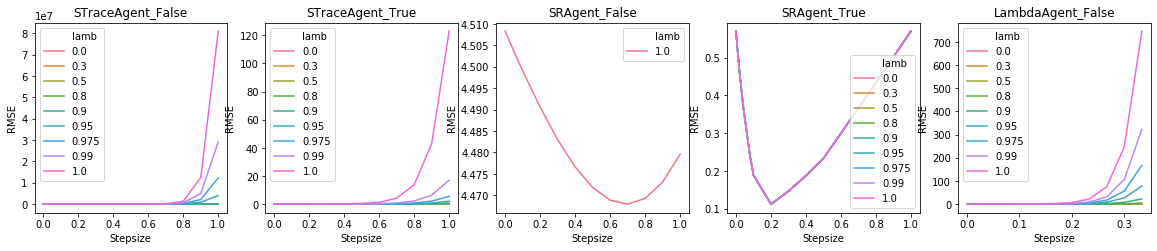

In [182]:
# ==
# Specify plots
plot_x = 'lr'
plot_y = 'v_vec_rmse'
plot_hue = 'lamb'
plot_ci = None  # Estimator, [None, 'sd']


# ==
# Plot

plt.figure(figsize=(20, 3.5))

# Generate subplots
total_n_plots = len(indep_col_df_dict)
n_plot_counter = 1
for k in indep_col_df_dict:
    # Current
    cur_df = indep_col_df_dict[k]
    
    # Generate palette
    n_hues = len(set(cur_df[plot_hue].values))
    c_palette = sns.color_palette("husl", n_hues)
    
    # Plot
    plt.subplot(1, total_n_plots, n_plot_counter)
    sns.lineplot(x=plot_x, y=plot_y, hue=plot_hue, 
                 ci=plot_ci, 
                 palette = c_palette,
                 data=cur_df)
    
    
    #plt.ylim([0, 1.5])
    plt.ylabel('RMSE')
    plt.xlabel('Stepsize')
    plt.title(str(k))
    
    # Counter var
    n_plot_counter += 1
    


#### Plotting a selected number of plots

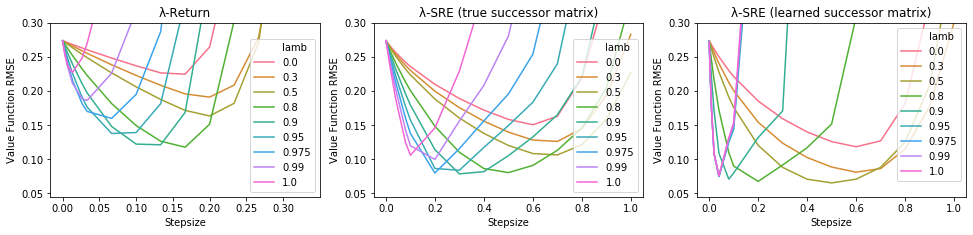

In [203]:
keys_2_plot = ['LambdaAgent_False', 'STraceAgent_True', 'STraceAgent_False']
titles_2_plot = ['λ-Return', 'λ-SRE (true successor matrix)', 'λ-SRE (learned successor matrix)']

# ==
# Specify plots
plot_x = 'lr'
plot_y = 'v_vec_rmse'
plot_hue = 'lamb'
plot_ci = None  # Estimator, [None, 'sd']


# ==
# Plot

plt.figure(figsize=(28, 3.2))

# Generate subplots
total_n_plots = len(indep_col_df_dict)
n_plot_counter = 1
for i in range(len(keys_2_plot)):
    cur_k = keys_2_plot[i]
    # Current
    cur_df = indep_col_df_dict[cur_k]
    
    # Generate palette
    n_hues = len(set(cur_df[plot_hue].values))
    c_palette = sns.color_palette("husl", n_hues)
    
    # Plot
    plt.subplot(1, total_n_plots, n_plot_counter)
    sns.lineplot(x=plot_x, y=plot_y, hue=plot_hue, 
                 ci=plot_ci, 
                 palette = c_palette,
                 data=cur_df)
    
    
    plt.ylim([0.045, 0.3])
    plt.ylabel('Value Function RMSE')
    plt.xlabel('Stepsize')
    plt.title(titles_2_plot[i])
    
    # Counter var
    n_plot_counter += 1
    


### Plot distribution of RMSE

1188


Text(0.5, 1.0, 'Distribution of RMSE under 0.1')

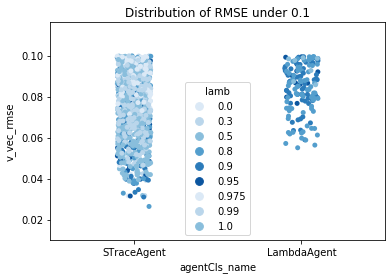

In [184]:
# Filter for dataframe
cur_df = epis_data_df.copy(deep=True)
cur_df = cur_df[cur_df['use_true_s_mat'] == False]
cur_df = cur_df[cur_df['v_vec_rmse'] < 0.1]
print(len(cur_df))

# Generate hue colour palette
c_palette = sns.color_palette("Blues")
#c_palette = sns.color_palette("ch:s=0.0,r=1.2")

# ==
# Plot
sns.stripplot(x='agentCls_name', y='v_vec_rmse', 
              hue='lamb', 
              palette=c_palette,
              data=cur_df)
plt.title('Distribution of RMSE under 0.1')


14603


Text(0.5, 1.0, 'Distribution of RMSE under 0.1')

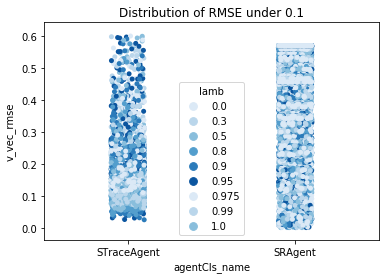

In [185]:
# Filter for dataframe
cur_df = epis_data_df.copy(deep=True)
cur_df = cur_df[cur_df['use_true_s_mat'] == True]
cur_df = cur_df[cur_df['v_vec_rmse'] < 0.6]
print(len(cur_df))

# Generate hue colour palette
c_palette = sns.color_palette("Blues")
#c_palette = sns.color_palette("ch:s=0.0,r=1.2")

# ==
# Plot
sns.stripplot(x='agentCls_name', y='v_vec_rmse', 
              hue='lamb', 
              palette=c_palette,
              data=cur_df)
plt.title('Distribution of RMSE under 0.1')


### Look at SR error and value error

8500


(0, 50)

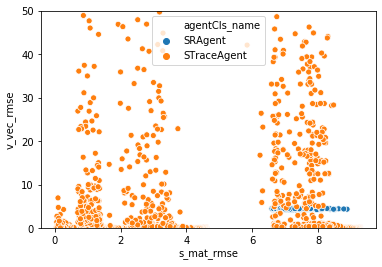

In [194]:
# ==
# Specify plots
plot_x = 's_mat_rmse'
plot_y = 'v_vec_rmse'
plot_hue = 'agentCls_name'
plot_x_ci = 'sd'  # Estimator, [None, 'sd']
plot_ci = 'sd'


# Filter for dataframe
cur_df = epis_data_df.copy(deep=True)
cur_df = cur_df[cur_df['use_true_s_mat'] == False]
cur_df = cur_df[cur_df['agentCls_name'].isin(['STraceAgent','SRAgent'])]

cur_df = cur_df.replace(to_replace='None', value=np.nan)
print(len(cur_df))

sns.scatterplot(x=plot_x, y=plot_y, 
                hue=plot_hue,
                #x_ci=plot_x_ci, ci=plot_ci, 
                data=cur_df)
plt.ylim([0, 50])
#plt.yscale('log')


In [ ]:
epis_data_df[epis_data_df['use_true_s_mat'].isin([False])]